In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data files
ride_data_orig = "Resources/Metro_Bike_Share_Trip_Data.csv"
ride_data_17_Q2 = "Resources/la_metro_gbfs_trips_Q2_2017.csv"
ride_data_17_Q3 = "Resources/metro-bike-share-trips-2017-q3.csv"
ride_data_17_Q4 = "Resources/metro-bike-share-trips-2017-q4-v2.csv"
ny_ride_data_Q1 = "Resources/data-ny-Q1.csv"
ny_ride_data_Q2 = "Resources/data-ny-Q2.csv"
ny_ride_data_Q3 = "Resources/data-ny-Q3.csv"
ny_ride_data_Q4 = "Resources/data-ny-Q4.csv"

# Create dataframes
ride_orig_df = pd.read_csv(ride_data_orig, low_memory=False)
ride_17_Q2_df = pd.read_csv(ride_data_17_Q2, low_memory=False)
ride_17_Q3_df = pd.read_csv(ride_data_17_Q3, low_memory=False)
ride_17_Q4_df = pd.read_csv(ride_data_17_Q4, low_memory=False)
ride_ny_Q1_df = pd.read_csv(ny_ride_data_Q1, low_memory=False)
ride_ny_Q2_df = pd.read_csv(ny_ride_data_Q2, low_memory=False)
ride_ny_Q3_df = pd.read_csv(ny_ride_data_Q3, low_memory=False)
ride_ny_Q4_df = pd.read_csv(ny_ride_data_Q4, low_memory=False)

ride_orig_df.rename(columns={'Start Time':'start_time'}, inplace=True)

# Pull 2017 Q1 data from original file
# Convert date/time strings to datetime objects
ride_orig_df['start_time'] = pd.to_datetime(ride_orig_df['start_time'], format='%m/%d/%Y %I:%M:%S %p')

# Add Year, Month, and Day columns
ride_orig_df['Year'] = ride_orig_df['start_time'].dt.year
ride_orig_df['Month'] = ride_orig_df['start_time'].dt.month
ride_orig_df['Day'] = ride_orig_df['start_time'].dt.day

ride_17_Q1_df = ride_orig_df.loc[ride_orig_df['Year'] == 2017]


In [2]:
### Custom Functions

### Datetime data after Q1 2017 is not zero padded and it has to be zero padded (see below)
def date_reformat(date_str):
    # split up the date field
    date_fields = date_str.split("/")
    
    # do the formatting
    if (len(date_str) == 6):
        # add zero to month and date
        new_date = "0" + date_fields[0] + "/0" + date_fields[1] + "/" + date_fields[2]
    elif (len(date_str) == 7):
        if (len(date_fields[0]) == 2):
            # add zero to day
            new_date = date_fields[0] + "/0" + date_fields[1] + "/" + date_fields[2]
        else:
            # add zero to month
            new_date = "0" + date_fields[0] + "/" + date_fields[1] + "/" + date_fields[2]
    else:
        new_date = date_str
    
    return new_date


In [3]:
# Setup to use date_reformat function
v_format = np.vectorize(date_reformat)

# Convert to zero padded
ride_ny_Q1_df['Date'] = v_format(ride_ny_Q1_df.Date)
ride_ny_Q2_df['Date'] = v_format(ride_ny_Q2_df.Date)
ride_ny_Q3_df['Date'] = v_format(ride_ny_Q3_df.Date)
ride_ny_Q4_df['Date'] = v_format(ride_ny_Q4_df.Date)

ride_ny_Q1_df['Date'] = pd.to_datetime(ride_ny_Q1_df['Date'], format='%m/%d/%y')
ride_ny_Q2_df['Date'] = pd.to_datetime(ride_ny_Q2_df['Date'], format='%m/%d/%y')
ride_ny_Q3_df['Date'] = pd.to_datetime(ride_ny_Q3_df['Date'], format='%m/%d/%y')
ride_ny_Q4_df['Date'] = pd.to_datetime(ride_ny_Q4_df['Date'], format='%m/%d/%y')

# Add month to make grouping easier
ride_ny_Q1_df['Month'] = ride_ny_Q1_df['Date'].dt.month
ride_ny_Q2_df['Month'] = ride_ny_Q2_df['Date'].dt.month
ride_ny_Q3_df['Month'] = ride_ny_Q3_df['Date'].dt.month
ride_ny_Q4_df['Month'] = ride_ny_Q4_df['Date'].dt.month


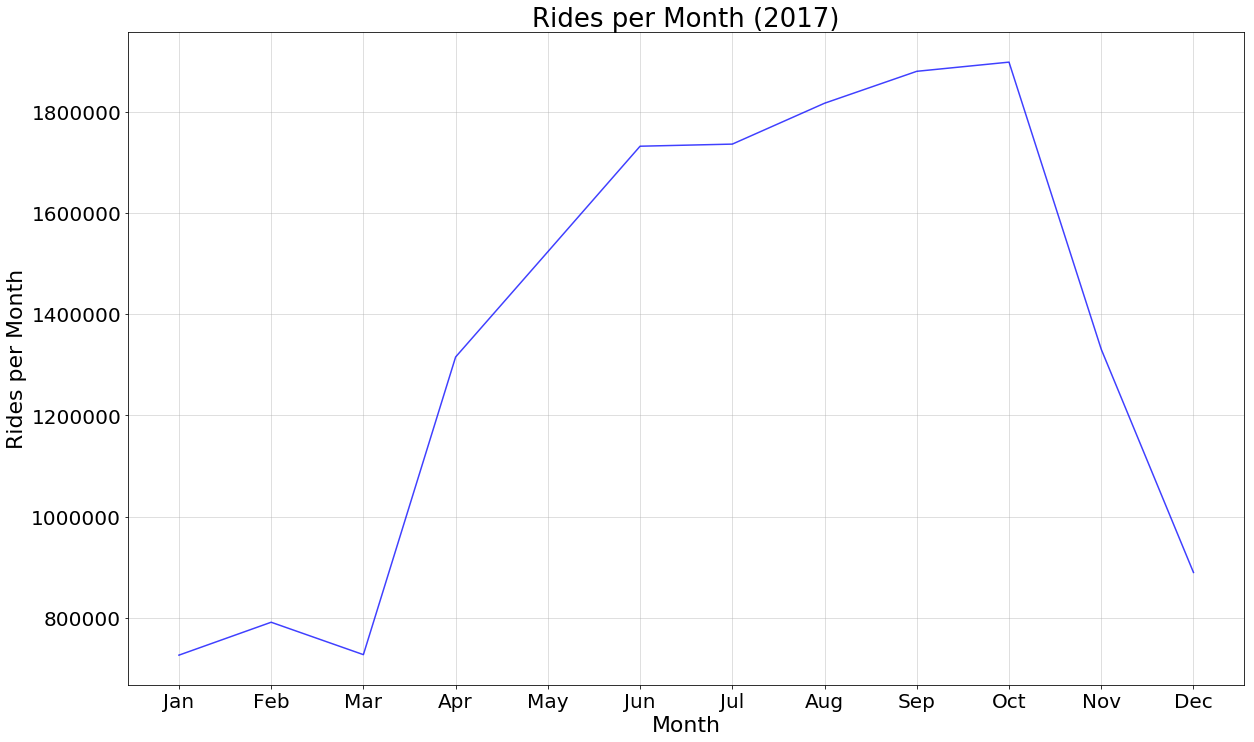

In [7]:
### Plot 2017 in NY

# Get rid of unnessary columns
ride_trim_ny_Q1_df = ride_ny_Q1_df[['Month', 'Trips over the past 24-hours (midnight to 11:59pm)']].copy()
ride_trim_ny_Q2_df = ride_ny_Q2_df[['Month', 'Trips over the past 24-hours (midnight to 11:59pm)']].copy()
ride_trim_ny_Q3_df = ride_ny_Q3_df[['Month', 'Trips over the past 24-hours (midnight to 11:59pm)']].copy()
ride_trim_ny_Q4_df = ride_ny_Q4_df[['Month', 'Trips over the past 24-hours (midnight to 11:59pm)']].copy()

# Create one dataframe
frames = [ride_trim_ny_Q1_df, ride_trim_ny_Q2_df, ride_trim_ny_Q3_df, ride_trim_ny_Q4_df]
combined_2017_ny_ride_df = pd.concat(frames, ignore_index=True)

# # Group by month
grouped_ny_ride_month = combined_2017_ny_ride_df.groupby(['Month']).sum()

# Create dataframe
grouped_ny_2017_df = pd.DataFrame(grouped_ny_ride_month)
grouped_ny_2017_df.head(20)

y_axis = grouped_ny_2017_df['Trips over the past 24-hours (midnight to 11:59pm)']

x_axis = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# # Set y axis limits
# axes = plt.gca()
# axes.set_ylim([100000,500000])

months_2017_handle = plt.plot(x_axis, y_axis, c='blue', alpha=0.75)

plt.grid(axis='both', alpha=0.5)
plt.xlabel("Month", fontsize = 22)
plt.ylabel("Rides per Month", fontsize = 22)
plt.title('Rides per Month (2017)', fontsize = 26)

plt.rcParams['figure.figsize'] = (20,12)

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)


In [5]:
# Show plot
plt.show()

In [6]:
# ['Date',
#  'Trips over the past 24-hours (midnight to 11:59pm)',
#  'Miles traveled today (midnight to 11:59 pm)',
#  'Total Annual Members (All Time)',
#  '24-Hour Passes Purchased (midnight to 11:59 pm)',
#  '3-Day Passes Purchased (midnight to 11:59 pm)']